## This Notebook provides an example of general usage of the module pytensor.

First, we import the module, aswell as other usefull packages.

In [1]:
import pytensor as pt
import sympy as sp

The coordinates and constants are defined before creating the metric, which in this case corresponds to the Schwarzschild metric. 

In [2]:
t,r,theta,phi = pt.def_coords('t,r,theta,phi')
a = pt.new_con('a')
g = pt.create_metric('ds2 = -dt**2*(1 + (a/r)) + (1 + (a/r))**(-1)*dr**2 + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2)')

Remember that the time coordinate must be the first coordinate.
Metric was defined successfully: 

Dimension = 4
Coordinates = t,r,theta,phi


<IPython.core.display.Math object>

<IPython.core.display.Math object>

We compute the Christoffel symbols of second kind

In [3]:
Chr = pt.christoffel()
Chr.display('^,_,_',aslist=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Then, the geodesic is computed.

In [4]:
Geodesic = pt.geodesic()[0]

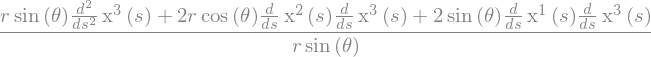

In [18]:
Geodesic[0]

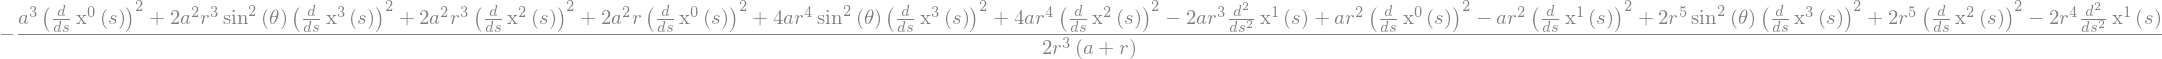

In [19]:
Geodesic[1]

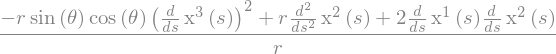

In [20]:
Geodesic[2]

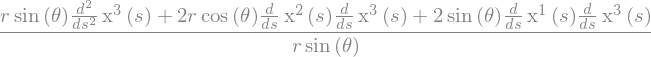

In [21]:
Geodesic[3]